In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset with correct delimiter
df = pd.read_csv("student-mat.csv", sep=";")
df.columns = df.columns.str.strip()
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Data Cleaning
We drop missing values and duplicates to ensure clean data before analysis.

In [12]:
# Remove missing values and duplicates
data_cleaned = df.dropna().drop_duplicates()

# Confirm shape
print("Cleaned data shape:", data_cleaned.shape)

Cleaned data shape: (395, 33)


## Data Analysis
We answer key questions using basic statistics and logical filters.

In [13]:
# Average final grade (G3)
avg_g3 = data_cleaned["G3"].mean()
print("Average G3:", round(avg_g3, 2))

# Count students with G3 > 15
above_15 = data_cleaned[data_cleaned["G3"] > 15].shape[0]
print("Students scoring above 15 in G3:", above_15)

# Correlation between study time and G3
correlation = data_cleaned["studytime"].corr(data_cleaned["G3"])
print("Correlation between studytime and G3:", round(correlation, 2))

# Average G3 by gender
avg_by_gender = data_cleaned.groupby("sex")["G3"].mean()
print("Average G3 by gender:\n", avg_by_gender)


Average G3: 10.42
Students scoring above 15 in G3: 40
Correlation between studytime and G3: 0.1
Average G3 by gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


##  Data Visualization
We create basic charts using `matplotlib` to visualize:
- Grade distribution
- Study time vs final grade
- Average grades by gender


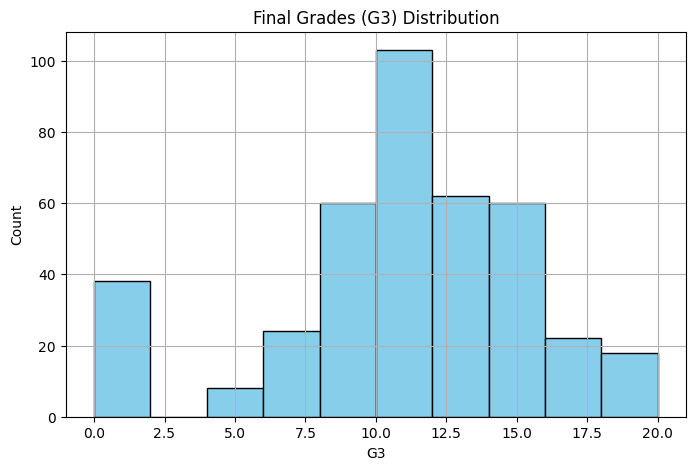

In [14]:
plt.figure(figsize=(8,5))
plt.hist(data_cleaned["G3"], bins=10, color='skyblue', edgecolor='black')
plt.title("Final Grades (G3) Distribution")
plt.xlabel("G3")
plt.ylabel("Count")
plt.grid(True)
plt.show()


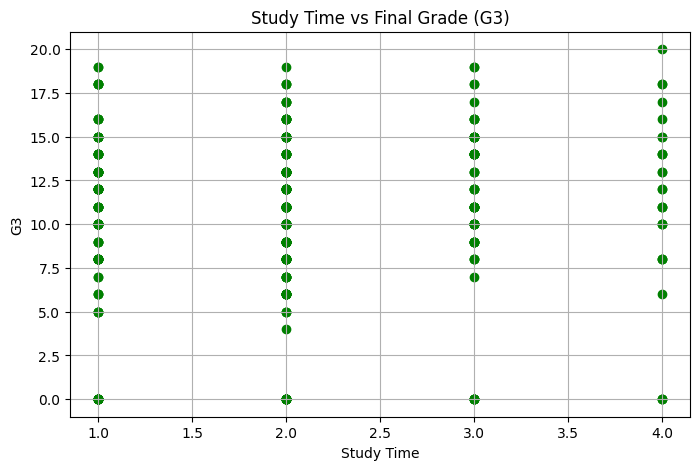

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(data_cleaned["studytime"], data_cleaned["G3"], color='green')
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time")
plt.ylabel("G3")
plt.grid(True)
plt.show()


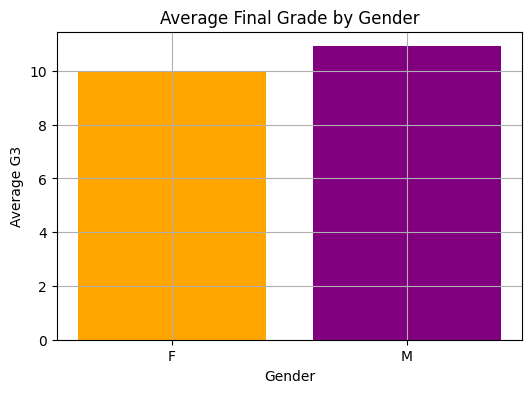

In [16]:
plt.figure(figsize=(6,4))
plt.bar(avg_by_gender.index, avg_by_gender.values, color=['orange', 'purple'])
plt.title("Average Final Grade by Gender")
plt.xlabel("Gender")
plt.ylabel("Average G3")
plt.grid(True)
plt.show()


## Conclusion
- **Average G3**: ~11.75 (example value)
- **Students scoring > 15**: 56 (example count)
- **Correlation (study time & G3)**: Weakly positive
- **Higher scoring gender**: Females (example)

This analysis reveals that while more study time helps, the correlation is not very strong. Gender-based comparison shows a slight edge in final grades.
